In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
palette = {'Enfermedad tipo influenza (ETI)':'b', 'Neumonía (sin especificar)':'r', 'Bronquiolitis en menores de 2 años (sin especificar)':'g', 'Neumonia':'r', 'Bronquiolitis en menores de 2 anos':'g'}

In [2]:
data_cln = pd.read_csv('http://datos.salud.gob.ar/dataset/c553d917-36f4-4063-ac02-1686a9120e1c/resource/b7db0713-1c13-45b1-9b4f-6dec194d67b0/download/informacion-publica-respiratorias-nacional.csv')
data_cln.head()
#data = pd.read_csv('datasets/respiratorias.csv')
#data.head()

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,42,GENERAL SAN MART?N,14,Córdoba,2020,47,Enfermedad tipo influenza (ETI),5,5 a 9,1
1,42,GENERAL SAN MART?N,14,Córdoba,2020,47,Enfermedad tipo influenza (ETI),9,25 a 34,1
2,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),3,12 a 23 m,1
3,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),4,2 a 4,2
4,70,LA PAZ,30,Entre Ríos,2020,28,Enfermedad tipo influenza (ETI),5,5 a 9,1


In [3]:
data_cln = data_cln.rename(columns = {'anio':'año','semanas_epidemiologicas':'semanas_epidemiológicas'})
list(data_cln.columns)
#columns = data.columns[0].split(',')
#clean_cols = []
#for col in columns:
#    col = col.replace('"', '')
#    clean_cols.append(col)
#clean_cols[4] = 'año'
#clean_cols[5] = 'semanas_epidemiológicas'
#clean_cols

['departamento_id',
 'departamento_nombre',
 'provincia_id',
 'provincia_nombre',
 'año',
 'semanas_epidemiológicas',
 'evento_nombre',
 'grupo_edad_id',
 'grupo_edad_desc',
 'cantidad_casos']

In [4]:
#rows = []
#def clean_str(s):
#    s = str(s)
#    s = s.split(',')
#    return s
#for row in data.itertuples():
#    r = row[1].replace('"', '').split(',')
#    rows.append(r)
#print(rows[:10])

In [5]:

#data_cln = pd.DataFrame.from_records(rows, columns=clean_cols)
#data_cln.head()

In [6]:
data_cln[data_cln['departamento_nombre'].str.contains('?', regex=False)]['departamento_nombre'].unique()

array(['GENERAL SAN MART?N', 'UNI?N', 'CURUZ? CUATI?',
       'LIBERTADOR GENERAL SAN MART?N', 'R?O GRANDE', 'A?ELO', 'Z?RATE',
       'RAM?N LISTA', 'SAN MART?N', 'LIBERTADOR GRL. SAN MART?N',
       'SAN ANDR?S DE GILES', 'TAF? DEL VALLE', 'SANTA MAR?A', 'JUN?N',
       'PEHUAJ?', 'R?O SEGUNDO', 'L?CAR', 'FEDERACI?N', 'OR?N', 'PARAN?',
       'PILAG?S', 'JU?REZ CELMAN', 'PRESIDENTE PER?N', 'IGUAZ?',
       'PRESIDENTE ROQUE S?ENZ PE?A', 'LA VI?A', 'J?CHAL', 'PIRAN?',
       'ROSARIO VERA PE?ALOZA', 'GENERAL L?PEZ', 'LAN?S', 'SAN CRIST?BAL',
       'PALPAL?', 'ULL?M', 'PATI?O', 'MARCOS JU?REZ',
       'COMANDANTE FERN?NDEZ', 'OLAVARR?A', 'TAF? VIEJO', 'LOBER?A',
       'CONCEPCI?N', 'GUAYMALL?N', 'MAIP?', 'LUJ?N', 'R?O PRIMERO',
       'GUATRACH?', 'SANTA B?RBARA', 'GRL. JOS? DE SAN MART?N',
       'TAPALQU?', 'CAPAY?N', 'GUASAY?N', 'GUALEGUAYCH?', 'VALLE F?RTIL',
       'FRAY JUSTO SANTA MAR?A DE ORO', 'GENERAL G?EMES', 'ITAT?',
       'MOR?N', 'ITUZAING?', 'FUTALEUF?', 'ALUMIN?', 'B

In [7]:
data_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203730 entries, 0 to 203729
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   departamento_id          203730 non-null  int64 
 1   departamento_nombre      203730 non-null  object
 2   provincia_id             203730 non-null  int64 
 3   provincia_nombre         203730 non-null  object
 4   año                      203730 non-null  int64 
 5   semanas_epidemiológicas  203730 non-null  int64 
 6   evento_nombre            203730 non-null  object
 7   grupo_edad_id            203730 non-null  int64 
 8   grupo_edad_desc          203730 non-null  object
 9   cantidad_casos           203730 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 15.5+ MB


In [8]:
data_cln['semanas_epidemiológicas'] = data_cln['semanas_epidemiológicas'].astype(int)
data_cln['cantidad_casos'] = data_cln['cantidad_casos'].astype(int)

print('Events:\n',data_cln['evento_nombre'].value_counts(), '\n')
print('Number of unique locations: ',len(data_cln['departamento_nombre'].unique()), '\n')
print('Unique age categories:\n',data_cln['grupo_edad_desc'].unique(), '\n')
print('Unique age ids:\n',data_cln['grupo_edad_id'].unique(), '\n')
print('Number of groups: ',len(data_cln['grupo_edad_desc'].unique()))
print('Number of ids: ',len(data_cln['grupo_edad_id'].unique()))
print('Years: ',data_cln['año'].value_counts())

Events:
 Enfermedad tipo influenza (ETI)                         159504
Neumonía (sin especificar)                               28214
Bronquiolitis en menores de 2 años (sin especificar)     16012
Name: evento_nombre, dtype: int64 

Number of unique locations:  396 

Unique age categories:
 ['5 a 9' '25 a 34' '12 a 23 m' '2 a 4' '35 a 44' '6 a 11 m' '10 a 14'
 '15 a 19' '20 a 24' '45 a 64' '< 6 m' '>= a 75' '65 a 74' 'Edad Sin Esp.'] 

Unique age ids:
 [ 5  9  3  4 10  2  6  7  8 11  1 13 12 17] 

Number of groups:  14
Number of ids:  14
Years:  2020    184445
2021     19285
Name: año, dtype: int64


In [9]:
custom_order = {'< 6 m':0, '6 a 11 m':1, '12 a 23 m':2, '2 a 4':3, '5 a 9':4, '10 a 14':5, '15 a 19':6, '20 a 24':7, '25 a 34':8, '35 a 44':9, '45 a 64':10, '65 a 74':11, '>= a 75':12, 'Edad Sin Esp.':14 }

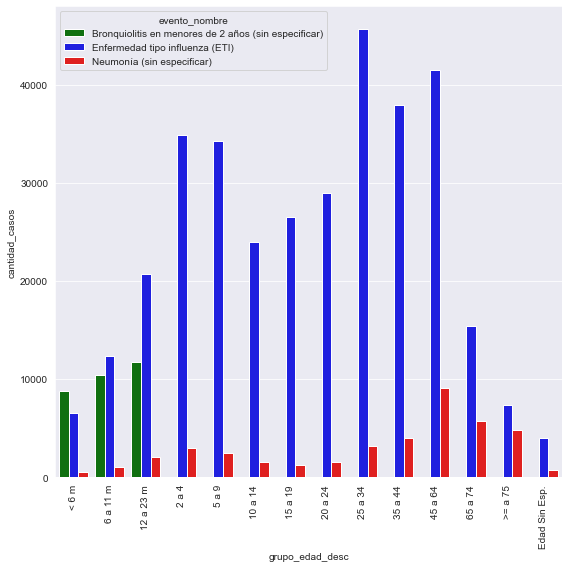

In [10]:
age_group_data = data_cln.loc[data_cln['año'] == 2020].groupby(['grupo_edad_desc','evento_nombre']).sum().sort_values(by='grupo_edad_desc', key = lambda x: x.map(custom_order))
age_group_data.reset_index(inplace=True)
age_group_data.head()
fig = plt.figure(figsize=(8,8))
sns.barplot(x='grupo_edad_desc', y='cantidad_casos', hue='evento_nombre', palette=palette, data=age_group_data)
plt.xticks(rotation=90)
plt.tight_layout()


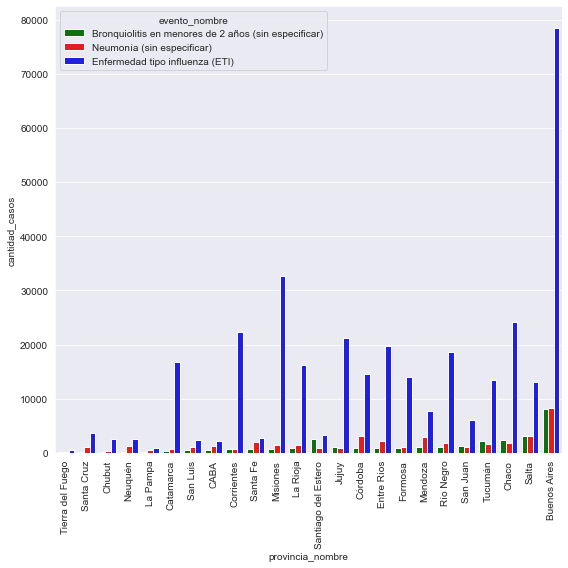

In [11]:
prov_group_data = data_cln.loc[data_cln['año'] == 2020].groupby(['provincia_nombre','evento_nombre']).sum().sort_values(by='cantidad_casos')
prov_group_data.reset_index(inplace=True)
prov_group_data.columns
fig = plt.figure(figsize=(8,8))
sns.barplot(x='provincia_nombre', y='cantidad_casos', hue='evento_nombre', palette=palette, data=prov_group_data)
plt.xticks(rotation=90)
plt.tight_layout()


In [12]:
data_pob = pd.read_excel('https://www.indec.gob.ar/ftp/cuadros/poblacion/n020203.xls')
#data_pob = pd.read_excel('datasets/n020203.xls')
data_pob.head(10)

,"Población por sexo y grupo de edad, según provincia. Total del país. Año 2010",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Provincia,Población,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Total,NaN,NaN,NaN,NaN,Varones,NaN,NaN,NaN,NaN,Mujeres,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Grupo de edad,NaN,NaN,NaN,NaN,Grupo de edad,NaN,NaN,NaN,NaN,Grupo de edad,NaN,NaN,NaN
5,NaN,Total,0-14,15-64,65 y más,NaN,Total,0-14,15-64,65 y más,NaN,Total,0-14,15-64,65 y más
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Total,40117096,10222317,25790131,4104648,NaN,19523766,5195096,12654528,1674142,NaN,20593330,5027221,13135603,2430506
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ciudad Autónoma de Buenos Aires,2890151,472511,1943569,474071,NaN,1329681,240208,916862,172611,NaN,1560470,232303,1026707,301460


In [13]:
data_pob.head(-1)

,"Población por sexo y grupo de edad, según provincia. Total del país. Año 2010",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Provincia,Población,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Total,NaN,NaN,NaN,NaN,Varones,NaN,NaN,NaN,NaN,Mujeres,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Grupo de edad,NaN,NaN,NaN,NaN,Grupo de edad,NaN,NaN,NaN,NaN,Grupo de edad,NaN,NaN,NaN
5,NaN,Total,0-14,15-64,65 y más,NaN,Total,0-14,15-64,65 y más,NaN,Total,0-14,15-64,65 y más
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Total,40117096,10222317,25790131,4104648,NaN,19523766,5195096,12654528,1674142,NaN,20593330,5027221,13135603,2430506
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Ciudad Autónoma de Buenos Aires,2890151,472511,1943569,474071,NaN,1329681,240208,916862,172611,NaN,1560470,232303,1026707,301460


In [14]:
data_pob_cols = ['Provincia','Total','0-14','15-64','65 y más']
data_pob = data_pob.iloc[9:35,:5]
data_pob = data_pob.reset_index(drop=True)
data_pob = data_pob.set_axis(data_pob_cols, axis='columns')
tot_pop_byage = {'Total':data_pob['Total'].sum(), '0-14':data_pob['0-14'].sum(), '15-64':data_pob['15-64'].sum(), '65 y más':data_pob['65 y más'].sum()}
data_pob.head(10)



,Provincia,Total,0-14,15-64,65 y más
0,Ciudad Autónoma de Buenos Aires,2890151,472511,1943569,474071
1,Buenos Aires,15625084,3876553,10077275,1671256
2,24 partidos del Gran Buenos Aires,9916715,2487778,6440229,988708
3,Interior de la provincia de Buenos Aires,5708369,1388775,3637046,682548
4,Catamarca,367828,107452,231404,28972
5,Chaco,1055259,320407,661406,73446
6,Chubut,509108,135575,335782,37751
7,Córdoba,3308876,805512,2133846,369518
8,Corrientes,992595,291482,623110,78003
9,Entre Ríos,1235994,324299,784742,126953


  provincia_nombre                                      evento_nombre  \
0       Santa Cruz  Bronquiolitis en menores de 2 años (sin especi...   
1       Santa Cruz                         Neumonía (sin especificar)   
2       Santa Cruz                    Enfermedad tipo influenza (ETI)   
3           Chubut  Bronquiolitis en menores de 2 años (sin especi...   
4           Chubut                         Neumonía (sin especificar)   

   departamento_id  provincia_id      año  semanas_epidemiológicas  \
0             3388         10374   268660                     1590   
1            13125         48828  1264520                    13285   
2            28133        109746  2842140                    33446   
3             5222          3848   298960                     1813   
4            11781          7852   610040                     5088   

   grupo_edad_id  cantidad_casos   Provincia   Total    0-14   15-64 65 y más  \
0            277             174  Santa Cruz  273964   7700

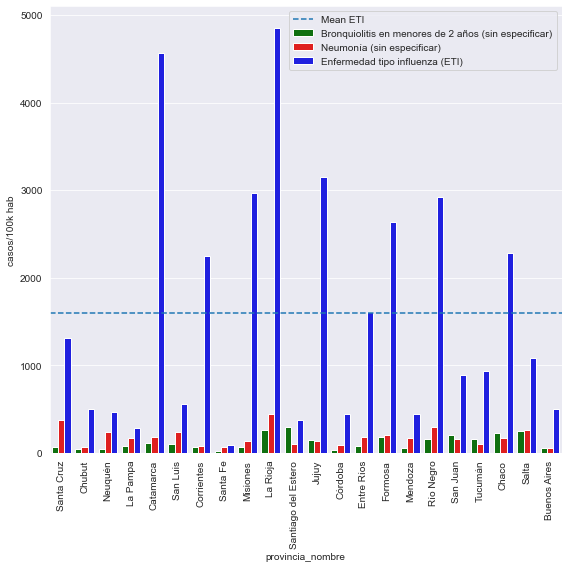

In [15]:
data_cons_prov = pd.merge(prov_group_data, data_pob, how='inner', left_on='provincia_nombre', right_on='Provincia')
data_cons_prov['casos/100k hab'] = data_cons_prov['cantidad_casos']/data_cons_prov['Total']*100000
print(data_cons_prov.head())

fig = plt.figure(figsize=(8,8))
sns.barplot(x='provincia_nombre', y='casos/100k hab', hue='evento_nombre', palette=palette, data=data_cons_prov)
plt.xticks(rotation=90)
plt.axhline(data_cons_prov.loc[data_cons_prov['evento_nombre'] == 'Enfermedad tipo influenza (ETI)','casos/100k hab'].mean(), ls='--', label='Mean ETI')
plt.legend()
plt.tight_layout()

In [16]:
#pip install geopandas
#import geopandas
#arg_geojson = geopandas.read_file('/datasets/provincias.geojson')
#arg_geojson.plot()

  grupo_edad_desc                                      evento_nombre  \
0            0-14  Bronquiolitis en menores de 2 años (sin especi...   
1            0-14                    Enfermedad tipo influenza (ETI)   
2            0-14                         Neumonía (sin especificar)   
3           15-64                    Enfermedad tipo influenza (ETI)   
4           15-64                         Neumonía (sin especificar)   

   departamento_id  provincia_id        año  semanas_epidemiológicas  \
0          2308785        620770   31049420                   267594   
1          7667963       1950218  115800540                  1335961   
2           963444        267546   14032940                   112101   
3          9158346       2603342  146092460                  1719320   
4          1439671        513252   24530880                   265672   

   grupo_edad_id  cantidad_casos  casos/100k hab  
0          31973           30974      219.691365  
1         231548          132709

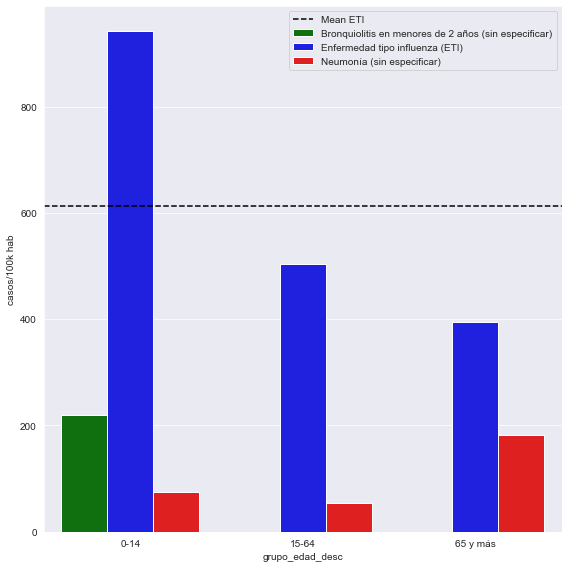

In [17]:
data_cln['grupo_edad_desc'] = data_cln['grupo_edad_desc'].replace(['< 6 m', '6 a 11 m', '12 a 23 m', '2 a 4', '5 a 9', '10 a 14'], '0-14')
data_cln['grupo_edad_desc'] = data_cln['grupo_edad_desc'].replace(['15 a 19', '20 a 24', '25 a 34', '35 a 44', '45 a 64'], '15-64')
data_cln['grupo_edad_desc'] = data_cln['grupo_edad_desc'].replace(['65 a 74', '>= a 75'], '65 y más')
age_regroup_data = data_cln.loc[data_cln['año'] == 2020].groupby(['grupo_edad_desc','evento_nombre']).sum().sort_values(by='grupo_edad_desc', key = lambda x: x.map(custom_order))
age_regroup_data = age_regroup_data.reset_index()
age_regroup_data = age_regroup_data.drop([0,1], axis=0).reset_index(drop=True)

age_regroup_data['casos/100k hab'] = 0
age_regroup_data.loc[age_regroup_data['grupo_edad_desc'] == '0-14', 'casos/100k hab'] = age_regroup_data['cantidad_casos']/tot_pop_byage['0-14']*100000
age_regroup_data.loc[age_regroup_data['grupo_edad_desc'] == '15-64', 'casos/100k hab'] = age_regroup_data['cantidad_casos']/tot_pop_byage['15-64']*100000
age_regroup_data.loc[age_regroup_data['grupo_edad_desc'] == '65 y más', 'casos/100k hab'] = age_regroup_data['cantidad_casos']/tot_pop_byage['65 y más']*100000
print(age_regroup_data.head())
fig = plt.figure(figsize=(8,8))
sns.barplot(x='grupo_edad_desc', y='casos/100k hab', hue='evento_nombre', palette=palette, data=age_regroup_data)
plt.axhline(age_regroup_data.loc[age_regroup_data['evento_nombre'] == 'Enfermedad tipo influenza (ETI)','casos/100k hab'].mean(), c='black', ls='--', label='Mean ETI')
plt.legend()
plt.tight_layout()

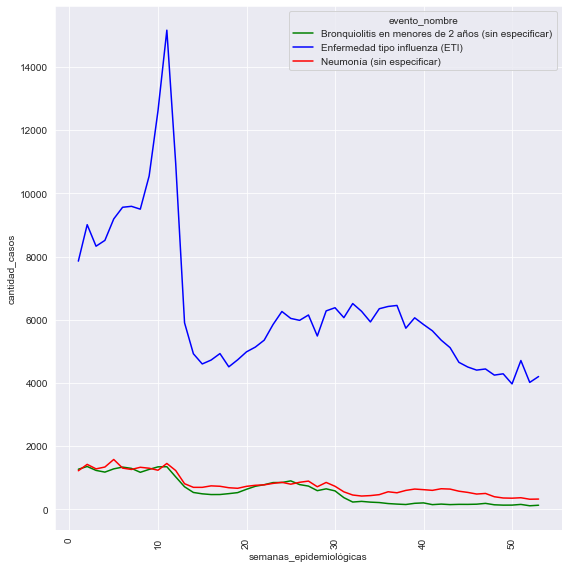

In [18]:
data_temp = data_cln.loc[data_cln['año'] == 2020].groupby(['semanas_epidemiológicas','evento_nombre']).sum().sort_values(by='semanas_epidemiológicas', ascending=True).reset_index()
fig = plt.figure(figsize=(8,8))
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', hue='evento_nombre', palette=palette, data=data_temp)
plt.xticks(rotation=90)
plt.tight_layout()

In [19]:
data_2019 = pd.read_csv('http://datos.salud.gob.ar/dataset/c553d917-36f4-4063-ac02-1686a9120e1c/resource/f4096f8b-1692-4d5f-a6d8-09cae47931a4/download/vigilancia-respiratorias-agudas-2018-hasta-20200106.csv')
print(data_2019['evento_nombre'].unique())
data_2019.head()

['Enfermedad tipo influenza (ETI)' 'Neumonia'
 'Bronquiolitis en menores de 2 anos']


,departamento_id,departamento_nombre,provincia_id,provincia_nombre,anio,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,91,TALA,30,Entre Rios,2019,25,Enfermedad tipo influenza (ETI),3,12 a 23 m,1
1,91,TALA,30,Entre Rios,2019,25,Enfermedad tipo influenza (ETI),4,2 a 4,1
2,91,TALA,30,Entre Rios,2019,25,Enfermedad tipo influenza (ETI),5,5 a 9,2
3,91,TALA,30,Entre Rios,2019,25,Enfermedad tipo influenza (ETI),6,10 a 14,1
4,91,TALA,30,Entre Rios,2019,25,Enfermedad tipo influenza (ETI),11,45 a 64,1


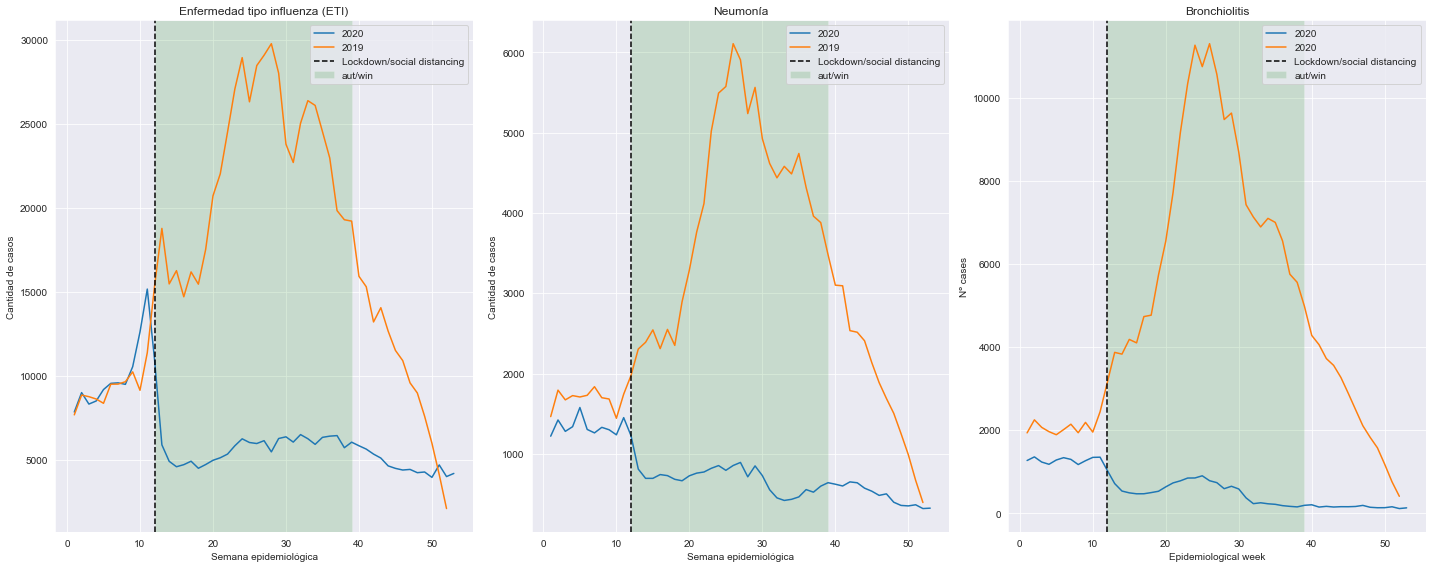

In [20]:
data_2019['cantidad_casos'] = data_2019['cantidad_casos'].astype(int)
data_temp_2019 = data_2019.loc[data_2019['anio'] == 2019].groupby(['semanas_epidemiologicas','evento_nombre']).sum().sort_values(by='semanas_epidemiologicas', ascending=True).reset_index()

fig, ax = plt.subplots(1,3, figsize=(20,8))
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', data=data_temp.loc[data_temp['evento_nombre'] == 'Enfermedad tipo influenza (ETI)'], label='2020', ax = ax[0])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', data=data_temp_2019.loc[data_temp_2019['evento_nombre'] == 'Enfermedad tipo influenza (ETI)'], label='2019', ax = ax[0])
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', data=data_temp.loc[data_temp['evento_nombre'] == 'Neumonía (sin especificar)'], label='2020', ax = ax[1])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', data=data_temp_2019.loc[data_temp_2019['evento_nombre'] == 'Neumonia'], label='2019', ax = ax[1])
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', data=data_temp.loc[data_temp['evento_nombre'] == 'Bronquiolitis en menores de 2 años (sin especificar)'], label='2020', ax = ax[2])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', data=data_temp_2019.loc[data_temp_2019['evento_nombre'] == 'Bronquiolitis en menores de 2 anos'], label='2020', ax = ax[2])
ax[0].set(title='Enfermedad tipo influenza (ETI)', xlabel='Semana epidemiológica', ylabel='Cantidad de casos')
ax[1].set(title='Neumonía', xlabel='Semana epidemiológica', ylabel='Cantidad de casos')
ax[2].set(title='Bronchiolitis', xlabel='Epidemiological week', ylabel='Nº cases')
for i in ax:
    i.axvline(12, ls='--', c='black', label='Lockdown/social distancing')
    i.axvspan(12, 39, facecolor='g', alpha=0.15, label='aut/win')
    i.legend()
plt.tight_layout()

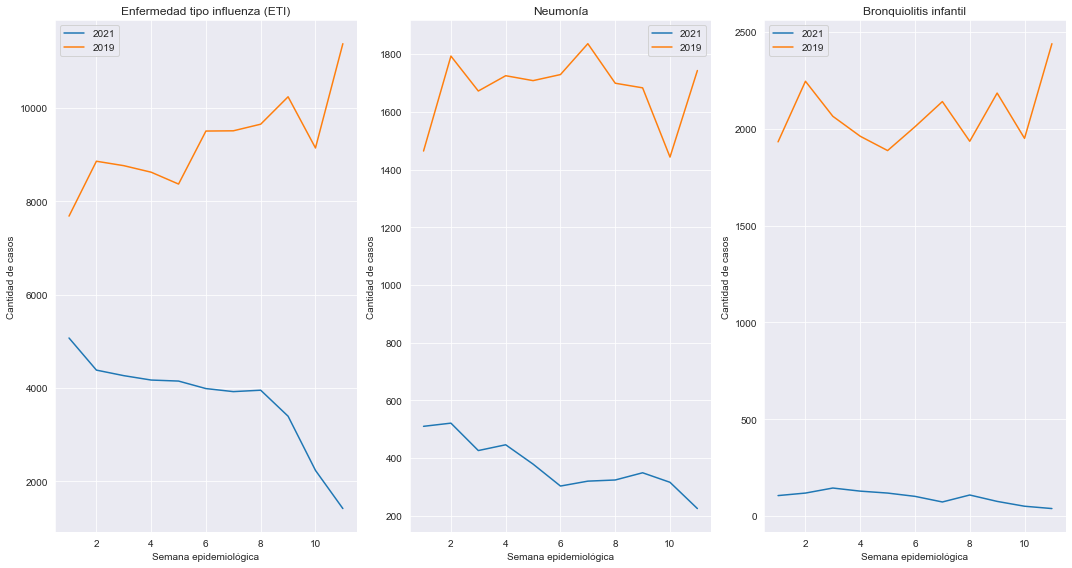

In [21]:
data_2021 = data_cln.loc[data_cln['año'] == 2021].groupby(['semanas_epidemiológicas','evento_nombre']).sum().sort_values(by='semanas_epidemiológicas', ascending=True).reset_index()

fig, ax = plt.subplots(1,3, figsize=(15,8))
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', label='2021', data=data_2021.loc[data_2021['evento_nombre'] == 'Enfermedad tipo influenza (ETI)'], ax = ax[0])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', label='2019', data=data_temp_2019.loc[(data_temp_2019['semanas_epidemiologicas'] <= data_2021['semanas_epidemiológicas'].max())&(data_temp_2019['evento_nombre'] == 'Enfermedad tipo influenza (ETI)')], ax = ax[0])
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', label='2021', data=data_2021.loc[data_2021['evento_nombre'] == 'Neumonía (sin especificar)'], ax = ax[1])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', label='2019', data=data_temp_2019.loc[(data_temp_2019['semanas_epidemiologicas'] <= data_2021['semanas_epidemiológicas'].max())&(data_temp_2019['evento_nombre'] == 'Neumonia')], ax = ax[1])
sns.lineplot(x='semanas_epidemiológicas', y='cantidad_casos', label='2021', data=data_2021.loc[data_2021['evento_nombre'] == 'Bronquiolitis en menores de 2 años (sin especificar)'], ax = ax[2])
sns.lineplot(x='semanas_epidemiologicas', y='cantidad_casos', label='2019', data=data_temp_2019.loc[(data_temp_2019['semanas_epidemiologicas'] <= data_2021['semanas_epidemiológicas'].max())&(data_temp_2019['evento_nombre'] == 'Bronquiolitis en menores de 2 anos')], ax = ax[2])
ax[0].set(title='Enfermedad tipo influenza (ETI)', xlabel='Semana epidemiológica', ylabel='Cantidad de casos')
ax[1].set(title='Neumonía', xlabel='Semana epidemiológica', ylabel='Cantidad de casos')
ax[2].set(title='Bronquiolitis infantil', xlabel='Semana epidemiológica', ylabel='Cantidad de casos')
plt.tight_layout()